# Voting in Classifier

In [107]:
from sklearn.datasets import make_moons
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [108]:
x,y=make_moons(n_samples=200,noise=0.2)
y

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [109]:
dict={
    'x1':x[:,0],
    'x2':x[:,1],
    'y':y[:]
}
df=pd.DataFrame(dict)
df.head(3)

,x1,x2,y
0,-0.230528,0.182915,1
1,0.411430,-0.683857,1
2,0.777258,-0.336794,1


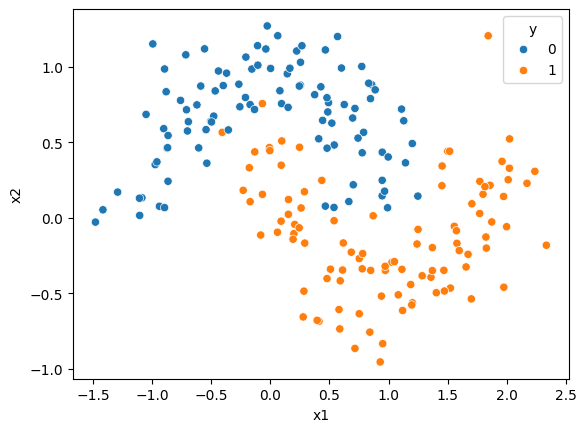

In [110]:
sns.scatterplot(x='x1',y='x2',data=df,hue='y')
plt.show()

In [111]:
new_x=df.iloc[:,:-1]
new_y=df['y']

In [112]:
x_train,x_test,y_train,y_test=train_test_split(new_x,new_y,test_size=0.2,random_state=20)

In [113]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [114]:
svm.score(x_train,y_train)*100,svm.score(x_test,y_test)*100

(94.375, 100.0)

In [115]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [116]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100


(100.0, 95.0)

In [117]:
Kn=KNeighborsClassifier()
Kn.fit(x_train,y_train)

KNeighborsClassifier()

In [118]:
Kn.score(x_train,y_train)*100,Kn.score(x_test,y_test)*100


(95.625, 97.5)

In [119]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [120]:
nb.score(x_train,y_train)*100,nb.score(x_test,y_test)*100

(85.625, 95.0)

In [121]:
list=[('SVM',SVC()),('dt',DecisionTreeClassifier()),('kn',KNeighborsClassifier()),('nb',GaussianNB())]

In [122]:
vc=VotingClassifier(list,weights=[20,18,20,16])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('SVM', SVC()), ('dt', DecisionTreeClassifier()),
                             ('kn', KNeighborsClassifier()),
                             ('nb', GaussianNB())],
                 weights=[20, 18, 20, 16])

In [123]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(96.25, 100.0)

In [124]:
dict1={
    'SVM':svm.predict(x_test),
    'DT':dt.predict(x_test),
    'Kn':Kn.predict(x_test),
    'nb':nb.predict(x_test),
    'vooting':vc.predict(x_test)
}

In [125]:
new_df=pd.DataFrame(dict1)
new_df.head(5)

,SVM,DT,Kn,nb,vooting
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,0,1,1
4,1,1,1,1,1


# Voting in regression

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [127]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


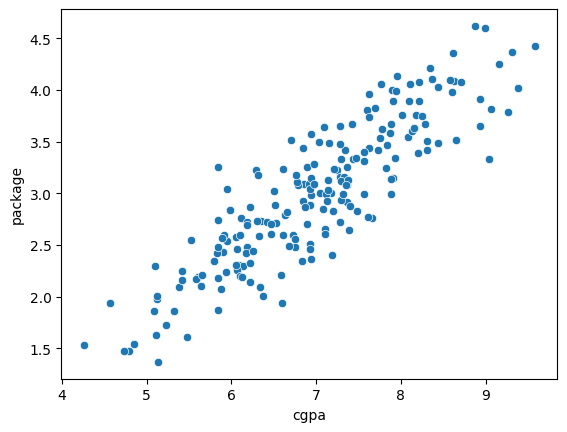

In [128]:
sns.scatterplot(x='cgpa',y='package',data=df)
plt.show()

In [129]:
x=df[['cgpa']]
y=df['package']

In [141]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [143]:
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(77.58339025733345, 77.30984312051673)

In [133]:
svm=SVR()
svm.fit(x_train,y_train)

SVR()

In [134]:
svm.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(78.16909319813372, 77.30984312051673)

In [135]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [136]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(95.1559200955432, 52.19733481708333)

In [146]:
list1=[('lr',LinearRegression()),('svm',SVR()),('Dt',DecisionTreeRegressor())]

In [147]:
vr=VotingRegressor(list1,weights=[2,3,4])
vr.fit(x_train1,y_train1)

VotingRegressor(estimators=[('lr', LinearRegression()), ('svm', SVR()),
                            ('Dt', DecisionTreeRegressor())],
                weights=[2, 3, 4])

In [148]:
vr.score(x_train1,y_train1)*100,vr.score(x_test1,y_test1)*100

(89.90240778267116, 72.90701100432881)

In [150]:
dict={
    'LinearRegression':lr.predict(x_test),
    'SVR':svm.predict(x_test),
    'DecisionTreeRegressor':dt.predict(x_test),
    'VotingRegressor':vr.predict(x_test)
}

In [151]:
new_df1=pd.DataFrame(dict)
new_df1.head(5)

,LinearRegression,SVR,DecisionTreeRegressor,VotingRegressor
0,2.780313,2.745462,2.9200,2.830779
1,3.136352,3.111375,3.2525,3.179648
2,3.199521,3.186923,2.9200,3.071090
3,2.389819,2.407183,2.5400,2.462354
4,3.526847,3.603909,3.9900,3.758380
